Created on Fri Jan 11 11:34:21 2019 <br>
@author: zoldi.miklos
# <h1><center> Correlation between z-coordinates and coverslip position (z-distance)</center></h1>

When doing STORM image, before image acquisition one can set distance from the coverslip. Usually we do not care about it and just click on "ok" (meaning z-distance = 0). Hence z position in the focal plane will be 0, and z-coordinates will be located in the calibration range (-400 - +400). 

However, when doing multicolor images and warp correction should be applied, coverslip position should be set as the amount of warp correction depends on the distance from coverslip. Having this input, z-coordinates are also recalculated, which should be 'normalized back to 0' to be able to filter/modify/align them in the usual ways.


In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
#import modules
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.layouts import row
from bokeh.models import Legend
#set plotting styles
%matplotlib inline
sns.set(style="darkgrid")
output_notebook()

Loading BokehJS ...

In [3]:
#set user-dependent variables
path = 'L:/Miki/Other_projects/Glutamaterg/THC_Cagliari/180606_gluerg_CA3_STORM/storms_quad//' # location of storm .txt files  
z_dist_file=path+"_z_distances.txt" #format: columns named as "stormfile"; "z_distance(nm)"; tab separated; sort for boxplots
ch1 = '405/647'
ch2 = '405/561'

In [4]:
#set parameters 
z_calib_range=float(400)
z_col = 16 #z coordinate
zc_col = 17 #drift corrected z coordinate
zw_col = 24 #warp coorected z coordinate
zwc_col = 25 #warp and drift coorected z coordinate
middle = 20000 #in nm, XY coordinate of point in the middle
filt_from_center = 5000 #in nm, half of the edge of the box to filter data from center

# Middle of Z-coordinates increases with the distance from the coverslip. <br> 

In [5]:
#get z-coordinates
#initializing empty lists for data
array_needed = False #set True if needed
z_dists  = [] #distances from coverslip 
z_ranges_ch1, z_ranges_ch2 = [], [] #all files, Zmax - Zmin
z_medians_ch1, z_medians_ch2 = [], [] #all files, Z middle 
zw_medians_ch1, zw_medians_ch2 = [], [] #all files, Zw middle 
zw_diffs_ch1, zw_diffs_ch2 = [], [] #all files, Zw-Z 
z_all, zw_all, zwdiff_all = [], [], [] #all files, all Z/Zw/Zw-Z

#Iterating over all stormfiles (listed in z_dist_file together with z-distances) as pandas dataframes
dt_z_dist=pd.read_csv(z_dist_file, delimiter = '\t')
for filename, z_dist in zip (dt_z_dist['stormfile'], dt_z_dist['z_distance(nm)']):
    print 'processing ' + filename + '\n' + 'z-distance = ' + str(z_dist) + '\n'  
    z_dists.append(z_dist)
    dt = pd.read_csv(path+filename, delimiter='\t')
    #filter for data in center box
    dt = dt.loc[(dt.Xc > middle - filt_from_center) & (dt.Xc < middle + filt_from_center) & \
                (dt.Yc > middle - filt_from_center) & (dt.Yc < middle + filt_from_center)]
    dt_ch1 = dt[dt['Channel Name'] == ch1] 
    dt_ch2 = dt[dt['Channel Name'] == ch2] 
    z_coords_ch1, z_coords_ch2 = dt_ch1.iloc[:, z_col], dt_ch2.iloc[:, z_col]
    zw_coords_ch1, zw_coords_ch2 = dt_ch1.iloc[:, zw_col], dt_ch2.iloc[:, zw_col]
    diff_ch1 = zw_coords_ch1 - z_coords_ch1 #zw should be always bigger than z if warp correction is applied for ch1
    diff_ch2 = zw_coords_ch2 - z_coords_ch2 #should be zero as warp correction is not applied to the lower-wavelength channel
    #adding calculated data to lis              
    z_ranges_ch1.append(z_coords_ch1.max() - z_coords_ch1.min())
    z_ranges_ch2.append(z_coords_ch2.max() - z_coords_ch2.min())         
    z_medians_ch1.append(z_coords_ch1.median())
    z_medians_ch2.append(z_coords_ch2.median())
    zw_medians_ch1.append(zw_coords_ch1.median())
    zw_medians_ch2.append(zw_coords_ch2.median())
    zw_diffs_ch1.append(diff_ch1.median())
    zw_diffs_ch2.append(diff_ch2.median())
    #adding all values of pandas Series object to *all list
    for i, j, k in zip(z_coords_ch1, zw_coords_ch1, diff_ch1):
        z_all.append(i)
        zw_all.append(j)
        zwdiff_all.append(k)

if array_needed:
    z_dists = np.array(z_dists)
    z_ranges_ch1 = np.array(z_ranges_ch1)
    z_ranges_ch2 = np.array(z_ranges_ch2)
    z_medians_ch1 = np.array(z_medians_ch1)
    z_medians_ch2 = np.array(z_medians_ch2)
    z_all = [np.array(i) for i in z_all]
    zw_all = [np.array(i) for i in zw_all]
    zwdiff_all = [np.array(i) for i in zwdiff_all]

processing BB187_VGluT_sl03_934_CB1_647_1116_Bsn_568_s001F_list-2018-06-20-19-03-41_S06.bin.txt
z-distance = 0

processing BB197_VGluT_sl01_934_CB1_647_1116_Bsn_568_s002F_list-2018-06-20-19-03-41_S21.bin.txt
z-distance = 0

processing BB197_VGluT_sl01_934_CB1_647_1116_Bsn_568_s005F_list-2018-06-20-19-03-41_S24.bin.txt
z-distance = 0

processing BB210_VGluT_sl01_934_CB1_647_1116_Bsn_568_s001F_list-2018-06-20-19-03-41_S38.bin.txt
z-distance = 0

processing BB210_VGluT_sl01_934_CB1_647_1116_Bsn_568_s002F_list-2018-06-20-19-03-41_S39.bin.txt
z-distance = 0

processing BB210_VGluT_sl01_934_CB1_647_1116_Bsn_568_s005F_list-2018-06-20-19-03-41_S42.bin.txt
z-distance = 0

processing BB210_VGluT_sl02_934_CB1_647_1116_Bsn_568_s003F_list-2018-06-20-19-03-41_S46.bin.txt
z-distance = 0

processing BB235_VGluT_sl01_934_CB1_647_1116_Bsn_568_s001F_list-2018-06-20-19-03-41_S57.bin.txt
z-distance = 0

processing BB235_VGluT_sl01_934_CB1_647_1116_Bsn_568_s005F_list-2018-06-20-19-03-41_S61.bin.txt
z-distan

processing BB235_VGluT_sl02_934_CB1_647_1116_Bsn_568_s002F_list-2018-06-20-19-03-41_S63.bin.txt
z-distance = 1875



In [7]:
#figure for median z-coordinates
p1 = figure (title="ch1 Middle z-coords vs z-distance", x_axis_label="z-distance", y_axis_label="ch1 Middle Z-coord", \
             plot_width=400, plot_height=400)
r1 = p1.circle(z_dists,z_medians_ch1, size = 10, fill_color='darkcyan', line_color='black')

p2 = figure (title="ch2 Middle z-coords vs z-distance", x_axis_label="z-distance", y_axis_label="ch2 Middle Z-coord", \
             plot_width=400, plot_height=400)
r2 = p2.circle(z_dists,z_medians_ch2, size = 10, fill_color='coral', line_color='black')
#fitting a line to data and determining gradient
gradient_ch1, intercept_ch1, r_value_ch1, p_value_ch1, std_err_ch1 = stats.linregress(z_dists,z_medians_ch1)
#adding x=y linear line
x_lin=np.linspace(0,2000,100)
p1.line(x_lin,x_lin, color='grey', line_dash='dashed')
p2.line(x_lin,x_lin, color='grey', line_dash='dashed')
#adding line fitted to points
x1=np.linspace(np.min(z_dists),np.max(z_dists),100)
y1=gradient_ch1*x1+intercept_ch1
p1.line(x1,y1,color='red', line_width=2, line_alpha=0.6)
p2.line(x1,y1,color='red', line_width=2, line_alpha=0.6)

plots = show(row(p1,p2),)
print "parameters for fitted line on ch1:",  "\n", "gradient = ", gradient_ch1, "\n", "r_value = ", r_value_ch1

parameters for fitted line on ch1: 
gradient =  0.7377312072764091 
r_value =  0.9935249305683882


__Increase is linear, but slope is not 1!__ <br>
This means that simply subtracting z-distances from the actual z-coordinate would cause a distance dependent decrease in the mean of coordinates (as slope is <1). 
Need for a corrigation factor (which is the gradient of the linear line). <br>
***
### So shifting z-related coordinates either with corrected (z-distance * gradient of line) or non-corrected (z-distance only) results in this:

In [ ]:
#initialize lists for plotting
corr_z_all, corr_zw_all, corr_wdiff_all = [], [], []
corr_z_med_all, corr_zw_med_all, corr_wdiff_med_all = [], [], []
noncorr_z_all, noncorr_zw_all, noncorr_wdiff_all = [], [], []
noncorr_z_med_all, noncorr_zw_med_all, noncorr_wdiff_med_all = [], [], [] 
        
#checks if gradient / corrigation factor exists        
try:
    corr_factor = gradient_ch1
    print  "Corrigation factor to be used = ", corr_factor 
except:
    corr_factor = 1.00
    print "No corrigation factor was found, simply z-distances will be subtracted from z-coordinates."  
   
#iterates over the very same filenames and z-distances specified earlier 
dt_z_dist = pd.read_csv(z_dist_file, delimiter = '\t')
z_dists = dt_z_dist['z_distance(nm)']
for filename, z_dist in zip (dt_z_dist['stormfile'], z_dists):
    print "processing ", filename, "\n", "z-distance = ", str(z_dist), "\n"
    #calculates shift to be used
    corr_z_dist = z_dist*corr_factor
    #reading files as pandas dataframe - filtering for data in center and for 405/647
    df = pd.read_table(path+filename, sep='\t')
    df = df[df['Channel Name'] == '405/647']
    df = df.loc[(df.Xc > middle - filt_from_center) & (df.Xc < middle + filt_from_center) & \
                (df.Yc > middle - filt_from_center) & (df.Yc < middle + filt_from_center)]
    df.reset_index(drop=True, inplace=True)
    #getting  z-related columns (z,zw) 
    z_df = df.iloc[:,z_col]
    zw_df = df.iloc[:,zw_col]
    #applying z-distance correction
    corr_z_df = z_df - corr_z_dist
    corr_zw_df = zw_df - corr_z_dist
    corr_wdiff_df = corr_zw_df.subtract(corr_z_df)
    noncorr_z_df = z_df - z_dist
    noncorr_zw_df = zw_df - z_dist
    noncorr_wdiff_df = noncorr_zw_df.subtract(noncorr_z_df)
    #get data for plotting   
    corr_z_med_all.append(corr_z_df.median())
    corr_zw_med_all.append(corr_zw_df.median())        
    corr_wdiff_med_all.append(corr_wdiff_df.median())

    corr_z_all.append(corr_z_df)
    corr_zw_all.append(corr_zw_df)
    corr_wdiff_all.append(corr_wdiff_df)
    #very same for non-corrected datasets
    noncorr_z_med_all.append(noncorr_z_df.median())
    noncorr_zw_med_all.append(noncorr_zw_df.median())        
    noncorr_wdiff_med_all.append(noncorr_wdiff_df.median())

    noncorr_z_all.append(noncorr_z_df)
    noncorr_zw_all.append(noncorr_zw_df)
    noncorr_wdiff_all.append(noncorr_wdiff_df)

#get all coordinates
corr_z_all, corr_zw_all, corr_wdiff_all = \
pd.concat(corr_z_all, axis=1), pd.concat(corr_zw_all, axis=1), pd.concat(corr_wdiff_all, axis=1)
corr_z_all.columns, corr_zw_all.columns, corr_wdiff_all.columns = z_dists, z_dists, z_dists

noncorr_z_all, noncorr_zw_all, noncorr_wdiff_all = \
pd.concat(noncorr_z_all, axis=1), pd.concat(noncorr_zw_all, axis=1), pd.concat(noncorr_wdiff_all, axis=1)
noncorr_z_all.columns, noncorr_zw_all.columns, noncorr_wdiff_all.columns = z_dists, z_dists, z_dists

In [ ]:
###script for shifting all z-related coordinates with the calculated corrigated z-distance###
        
#checks if gradient / corrigation factor exists        
try:
    corr_factor = gradient_ch1
    print  "Corrigation factor to be used = ", corr_factor 
except:
    corr_factor = 1.00
    print "No corrigation factor was found, simply z-distances will be subtracted from z-coordinates."  
   
#iterates over the very same filenames and z-distances specified earlier 
dt_z_dist = pd.read_csv(z_dist_file, delimiter = '\t')
z_dists = dt_z_dist['z_distance(nm)']
for filename, z_dist in zip (dt_z_dist['stormfile'], z_dists):
    print "processing ", filename, "\n", "z-distance = ", str(z_dist), "\n"
    #calculates shift to be used
    corr_z_dist = z_dist*corr_factor
    #reading files as pandas dataframe without keeping z-rejected lines (both channels)!
    df = pd.read_table(path+filename, sep='\t')
    df = df[df['Channel Name'] != 'Z Rejected']
    #getting all the z-related columns (z,zc,zw,zwc) 
    z_df = df.iloc[:,z_col]
    zc_df = df.iloc[:,zc_col]
    zw_df = df.iloc[:,zw_col]
    zwc_df = df.iloc[:,zwc_col]
    #applying z-distance correction
    corr_z_df = z_df - corr_z_dist
    corr_zc_df = zc_df - corr_z_dist
    corr_zw_df = zw_df - corr_z_dist
    corr_zwc_df = zwc_df - corr_z_dist

    #export txt files (without indexing), replacing z,zc,zw,zwc columns with the z-distance corrected values             
    to_concat = [df.iloc[:,0:z_col], corr_z_df, corr_zc_df, df.iloc[:,zc_col+1:zw_col], corr_zw_df, corr_zwc_df]
    corr_df = pd.concat(to_concat, axis=1)
    outputfile = corr_df.to_csv(path+filename.replace('.txt' ,'_Zmod.txt'), sep='\t', header=True, index=False)

Corrigation factor to be used =  0.7377312072764091
processing  BB187_VGluT_sl03_934_CB1_647_1116_Bsn_568_s001F_list-2018-06-20-19-03-41_S06.bin.txt 
z-distance =  0 

processing  BB197_VGluT_sl01_934_CB1_647_1116_Bsn_568_s002F_list-2018-06-20-19-03-41_S21.bin.txt 
z-distance =  0 

processing  BB197_VGluT_sl01_934_CB1_647_1116_Bsn_568_s005F_list-2018-06-20-19-03-41_S24.bin.txt 
z-distance =  0 

processing  BB210_VGluT_sl01_934_CB1_647_1116_Bsn_568_s001F_list-2018-06-20-19-03-41_S38.bin.txt 
z-distance =  0 

processing  BB210_VGluT_sl01_934_CB1_647_1116_Bsn_568_s002F_list-2018-06-20-19-03-41_S39.bin.txt 
z-distance =  0 

processing  BB210_VGluT_sl01_934_CB1_647_1116_Bsn_568_s005F_list-2018-06-20-19-03-41_S42.bin.txt 
z-distance =  0 

processing  BB210_VGluT_sl02_934_CB1_647_1116_Bsn_568_s003F_list-2018-06-20-19-03-41_S46.bin.txt 
z-distance =  0 



In [48]:
#figure (means): comparing corrected and non-corrected z-distance-shifted coordinates
p1 = figure (title="Distribution of Z-coordinates", \
             x_axis_label="z-distance", y_axis_label="ch1 Middle Z-coord", plot_width=400, plot_height=400)
r1 = p1.circle(z_dists,corr_z_med_all, size = 10, fill_color='darkcyan', line_color='black')
r2 = p1.circle(z_dists,noncorr_z_med_all, size = 10, fill_color='coral', line_color='black')

p2 = figure (title="Distribution of Zw (warp)-coordinates", \
             x_axis_label="z-distance", y_axis_label="ch1 Middle Zw-coord", y_range=p1.y_range, plot_width=400, plot_height=400)
r3 = p2.circle(z_dists,corr_zw_med_all, size = 10, fill_color='darkcyan', line_color='black')
r4 = p2.circle(z_dists,noncorr_zw_med_all, size = 10, fill_color='coral', line_color='black')

p1.add_layout(Legend(items=[('corrected',[r1]),('non_corrected',[r2])],location="bottom_left"))
p2.add_layout(Legend(items=[('corrected',[r3]),('non_corrected',[r4])],location="bottom_left"))

show(row([p1,p2]))

__Shifting__ z-related coordinates only __with corrected z distance__ normalizes means back to 0. <br>
Note that warp-corrected coordinates are above 0 as they are indeed warp corrected. The two figures for ch2 would be the very same, as warp correction is only applied for the channel with higher wavelength (ch1).
***

### Let's visualize the very same dataset with boxplots to see the extent (ranges) of z-coordinates:  

In [49]:
#figure (boxplot): ALL Z, corrected and non-corrected z-distance-shifted coordinates 
fig1, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (20,10), sharey=True)
fig1.suptitle ("Distribution of shifted Z-coordinates - corrected vs non-corrected", fontsize=18)
bp_1 = corr_z_all.boxplot(ax=ax1, patch_artist=True, rot=45,  grid=True, widths=0.25, \
                          flierprops=dict(markerfacecolor='g', marker='D'), \
                          medianprops=dict(linestyle='-', linewidth=4, color='purple'))
ax1.set(xlabel='z-distances', ylabel='corrected z-coord')
ax1.yaxis.label.set_fontsize(18)
line1 = ax1.axhline(0, linewidth=2, color='red', alpha=0.5)

bp_2 = noncorr_z_all.boxplot(ax=ax2, patch_artist=True, rot=45,  grid=True, widths=0.25, \
                             flierprops=dict(markerfacecolor='g', marker='D'), \
                             medianprops=dict(linestyle='-', linewidth=4, color='purple'))
ax2.set(xlabel='z-distances', ylabel='non-corrected z-coord')
ax2.yaxis.label.set_fontsize(18)
line1 = ax2.axhline(0, linewidth=2, color='red', alpha=0.5)

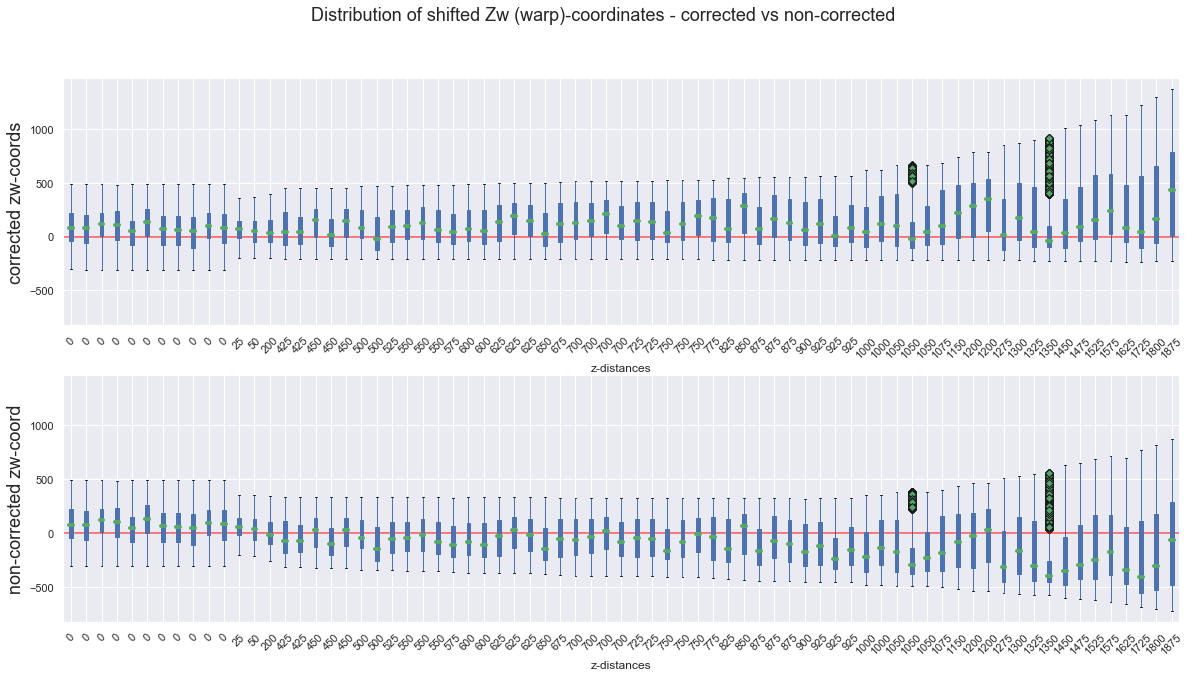

In [50]:
#figure (boxplot): ALL ZW, comparing corrected and non-corrected z-distance-shifted coordinates 
fig1, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (20,10), sharey=True)
fig1.suptitle ("Distribution of shifted Zw (warp)-coordinates - corrected vs non-corrected", fontsize=18)
bp_1 = corr_zw_all.boxplot(ax=ax1, patch_artist=True, rot=45,  grid=True, widths=0.25, \
                          flierprops=dict(markerfacecolor='g', marker='D'), \
                          medianprops=dict(linestyle='-', linewidth=4, color='purple'))

ax1.set(xlabel='z-distances', ylabel='corrected zw-coords')
ax1.yaxis.label.set_fontsize(18)
line1 = ax1.axhline(0, linewidth=2, color='red', alpha=0.5)

bp_2 = noncorr_zw_all.boxplot(ax=ax2, patch_artist=True, rot=45,  grid=True, widths=0.25, \
                             flierprops=dict(markerfacecolor='g', marker='D'), \
                             medianprops=dict(linestyle='-', linewidth=4, color='purple'))
ax2.set(xlabel='z-distances', ylabel='non-corrected zw-coord')
ax2.yaxis.label.set_fontsize(18)
line1 = ax2.axhline(0, linewidth=2, color='red', alpha=0.5)

Note:
- the possible z-range of a given storm image increases with distance, but that is mainly dictated by outliers on the 'high end' of the third quartile, so the medians are quite constant.  <br>
- it is increasing more steeply for Zw coords, especially at a depth of 1 um. <br>
__Here the range of warp corrected z-coordinates can be as big as 1,5 um!__ <br>

In [52]:
#figure z-ranges
#note: does not matter whether you work with the non-shifted or shifted dataset (ranges are the very same) 
corr_z_range = [abs(corr_z_all.iloc[:,i].min() - corr_z_all.iloc[:,i].max()) for i in range(len(z_dists))]
corr_zw_range = [abs(corr_zw_all.iloc[:,i].min() - corr_zw_all.iloc[:,i].max()) for i in range(len(z_dists))]
p1 = figure (title="Extent of Z-coordinates", \
             x_axis_label="z-distance", y_axis_label="ch1 z-range", plot_width=400, plot_height=400)
r1 = p1.circle(z_dists,corr_z_range, size = 10, fill_color='darkcyan', line_color='black')

p2 = figure (title="Extent of Zw (warp)-coordinates", \
             x_axis_label="z-distance", y_axis_label="ch1 zw-range", y_range=p1.y_range, plot_width=400, plot_height=400)
r2 = p2.circle(z_dists,corr_zw_range, size = 10, fill_color='darkcyan', line_color='black')

show(row([p1,p2]))

***
# This is because the amount of warp correction is heavily distance dependent:


In [54]:
#figure for Zw/Zc difference
p1 = figure (title="Warp correction vs z-distance, Ch1", x_axis_label="z-distance", \
             y_axis_label="ch1 warp correction (median)", plot_width=400, plot_height=400)
r1 = p1.circle(z_dists,zw_diffs_ch1, size = 10, fill_color='darkcyan', line_color='black')

p2 = figure (title="No warp correction for lower wavelength (ch2)", x_axis_label="z-distance", \
             y_axis_label="ch2 warp correction (median)", plot_width=400, plot_height=400, y_range=p1.y_range)
r2 = p2.circle(z_dists,zw_diffs_ch2, size = 10, fill_color='coral', line_color='black')
plots = show(row(p1,p2))

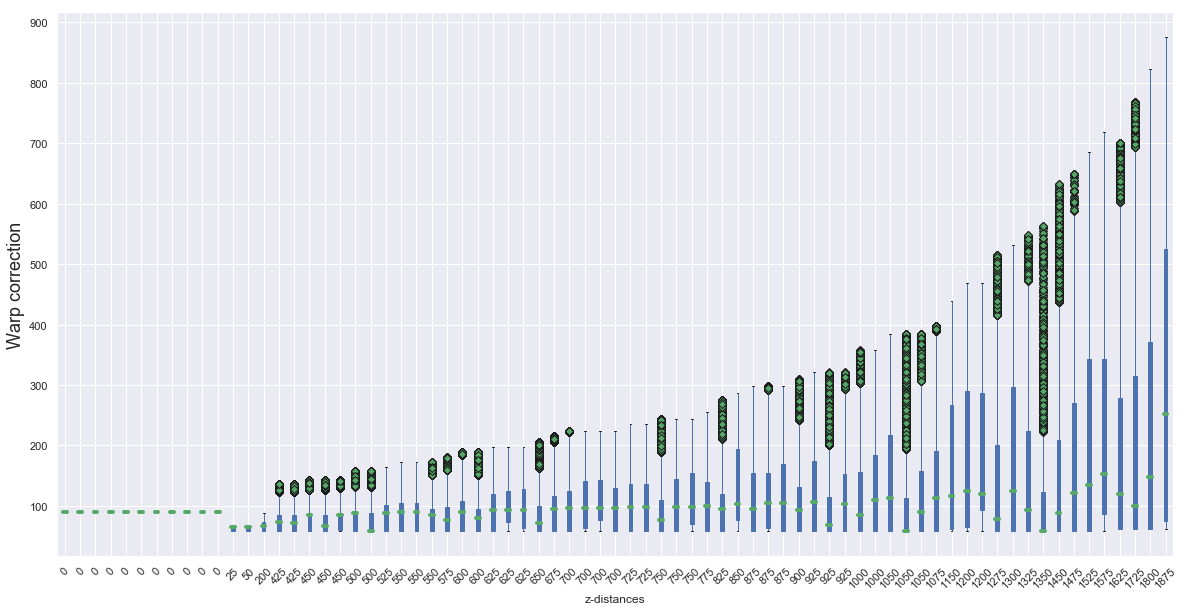

In [55]:
#figure for Zw/Zc difference (boxplot)
fig1, ax1 = plt.subplots(figsize = (20,10))
# fig1.suptitle ("Amount of warp correction is distance dependent", fontsize=18)
bp_1 = corr_wdiff_all.boxplot(ax=ax1, patch_artist=True, rot=45,  grid=True, widths=0.25, \
                          flierprops=dict(markerfacecolor='g', marker='D'), \
                          medianprops=dict(linestyle='-', linewidth=4, color='purple'))

ax1.set(xlabel='z-distances', ylabel='Warp correction')
ax1.yaxis.label.set_fontsize(18)

Note: 
 - __average warp correction is in the range of 100-150 nm__
 - At increasing depth, Z-warp correction can be as big as __1000 nm!!__ 
 - If z-distance is is not given (z-distance = 0), Warp-correction has always a default value (here 90nm) for different z-coordinates as well.__ <br>
Also written to zcal txt file! : z calibration wave offset=Obj=Apo TIRF 100x Oil DIC N2;647:561=90.00; <br>


- It is not the best, as __warp correction should also differ between different z-coordinates imaged at a given z-distance__ See here for first and last line <br>
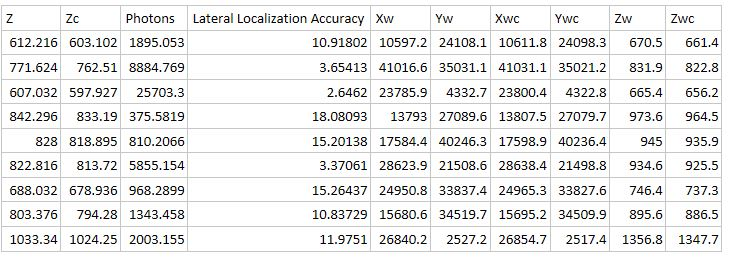
***

## Hence, the difference between measured and real positions between channels is increasing with distance/depth <br>

In [59]:
#figure for median z-coordinates, compare ch2 vs ch1 and warp
p1 = figure (title="Difference between warp and non-warp corrected coordinates ", x_axis_label="z-distance", \
             y_axis_label="Middle Z-coord", plot_width=800, plot_height=400)
r1 = p1.circle(z_dists,z_medians_ch1, size = 7, fill_color='darkcyan', line_color='black', legend="ch1, non-corrected")
# r2 = p1.circle(z_dists,z_medians_ch2, size = 7, fill_color='coral', line_color='black', legend="ch2")
r3 = p1.circle(z_dists,zw_medians_ch1, size = 7, fill_color='pink', line_color='black', legend="ch1, warp-corrected")
show(p1)

## Important!
- Should filter for z-coordinates to throw out these lot of outlier points! Here, it is maybe better to filter relative to the median (and not relative to 0) for a given range (or for a given proportion of molecules)
- Should image close to the surface!
- Would be good to adjust as least a minimal value (like 0.25) for z-distance? This would not screw up all these z-coordinate things, but would introduce distance dependent warp correction at least in that single imaging plane!
- Can we do multi-color STORM image deep (here I mean 1 um) in the tissue? Or again, thin slices should be used?!
<br> <br>
- <font color='red'>__Should check whether the meaningful proportion, like +- 150/200 nm, calculated from the median is the very same! So only outliers are more extreme which we would throw out anyway__</font> <br>